In [1]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Dataset

In [2]:
np.random.seed(1)

In [3]:
x, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)

In [4]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(
    x=x[:, 0].flatten(),
    y=x[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),
        colorscale='YlGn',
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

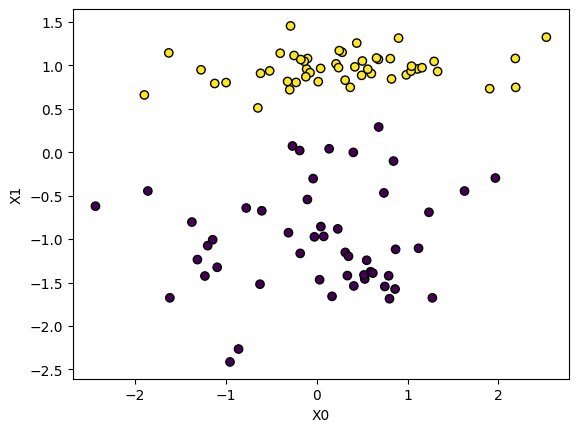

In [5]:
plt.scatter(x[:,0],x[:,1], c=y, marker = 'o', edgecolors='k')
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [6]:
y = y.reshape(y.shape[0],1)
y.shape

(100, 1)

In [7]:
X = np.hstack((x,np.ones((x.shape[0],1))))
X.shape

(100, 3)

In [8]:
theta = np.random.rand(3,1)

# Modèle

In [9]:
def model(X,theta):
    return 1/(1+np.exp(-X.dot(theta)))

In [10]:
X0 = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
X1 = np.linspace(x[:, 1].min(), x[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = theta[0] * xx0 + theta[1] * xx1 + theta[2]
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))


fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

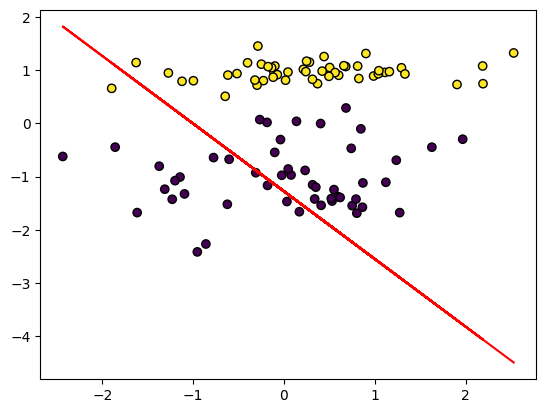

In [11]:
plt.scatter(X[:,0],X[:,1], c=y, marker = 'o', edgecolors='k')
plt.plot(x[:,0],-(1/theta[1])*(theta[2]+theta[0]*x[:,0]), c='r')
plt.show()

# Fonction coût

In [12]:
def cost_function(X,y,theta):
    m = len(y)
    return -(1/m) * np.sum(y*np.log(model(X,theta))+(1-y)*np.log(1-model(X,theta)))

In [13]:
cost_function(X,y,theta)

0.5529832812474355

# Gradient et descente de gradient

In [14]:
def grad(X,y,theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [15]:
def gradient_descent(X,y,theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] = cost_function(X,y,theta)
    return theta, cost_history

# Machine Learning

In [16]:
theta_final, cost_history = gradient_descent(X,y,theta, 0.01 ,10000)

In [17]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = theta_final[0] * xx0 + theta_final[1] * xx1 + theta_final[2]
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))


fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

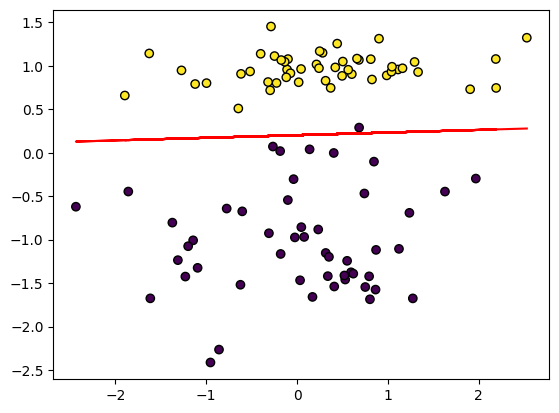

In [18]:
plt.scatter(X[:,0],X[:,1], c=y, marker = 'o', edgecolors='k')
plt.plot(x[:,0],-(1/theta_final[1])*(theta_final[2]+theta_final[0]*x[:,0]), c='r')
plt.show()

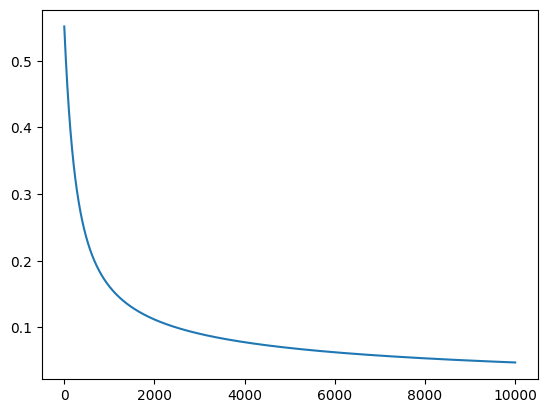

In [19]:
plt.plot(range(10000), cost_history)
plt.show()

In [20]:
def coeff_determination(y, pred):
    u = ((y-pred)**2).sum()
    v = ((y-y.mean())**2).sum()
    return 1 - u/v

In [21]:
coeff_determination(y, model(X,theta_final))

0.9653457718239276